In [1]:
import xarray as xr
import sklearn

import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.stats import percentileofscore



In [2]:
#load the cleaned csvs
df_h_pr=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2/EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.pt_reyes.csv")
df_p_pr=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2/EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.pt_reyes.csv")

In [6]:
list(df_h_pr.columns)[1:-1]

['windspeed', 'psl', 'uas', 'vas']

In [10]:
df_h_pr.where(df_h_pr.month== m)[v]

0        4.701028
1        4.973078
2        3.189834
3        4.874374
4        8.353453
           ...   
23736         NaN
23737         NaN
23738         NaN
23739         NaN
23740         NaN
Name: windspeed, Length: 23741, dtype: float64

['windspeed', 'psl', 'uas', 'vas']


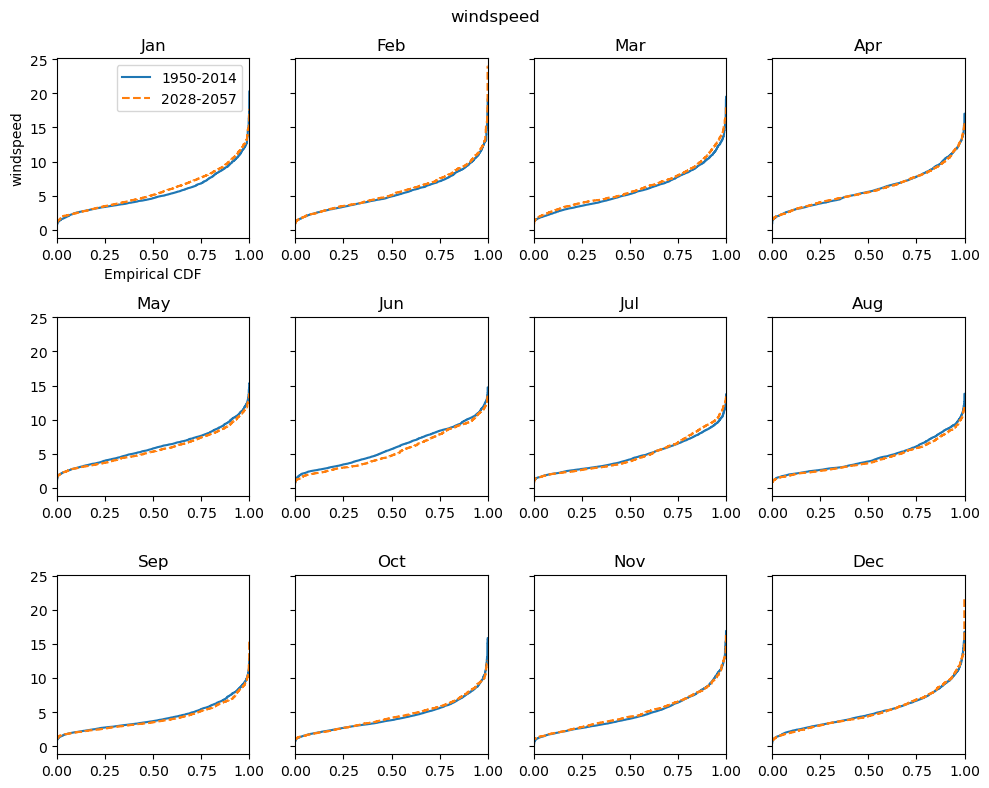

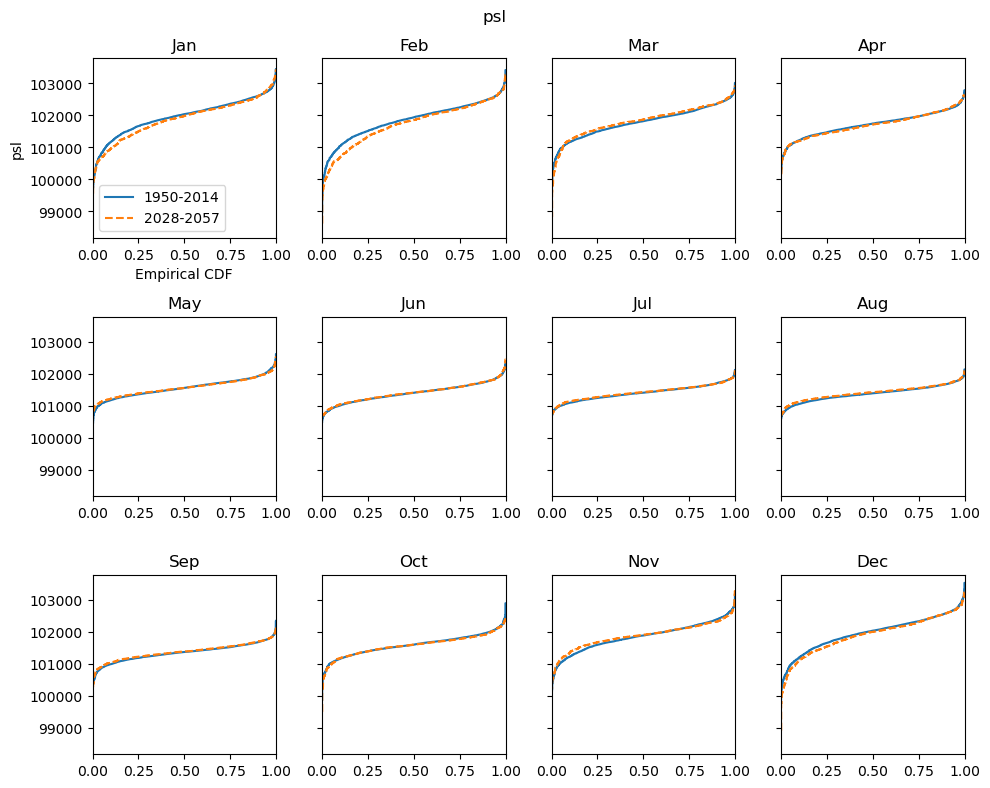

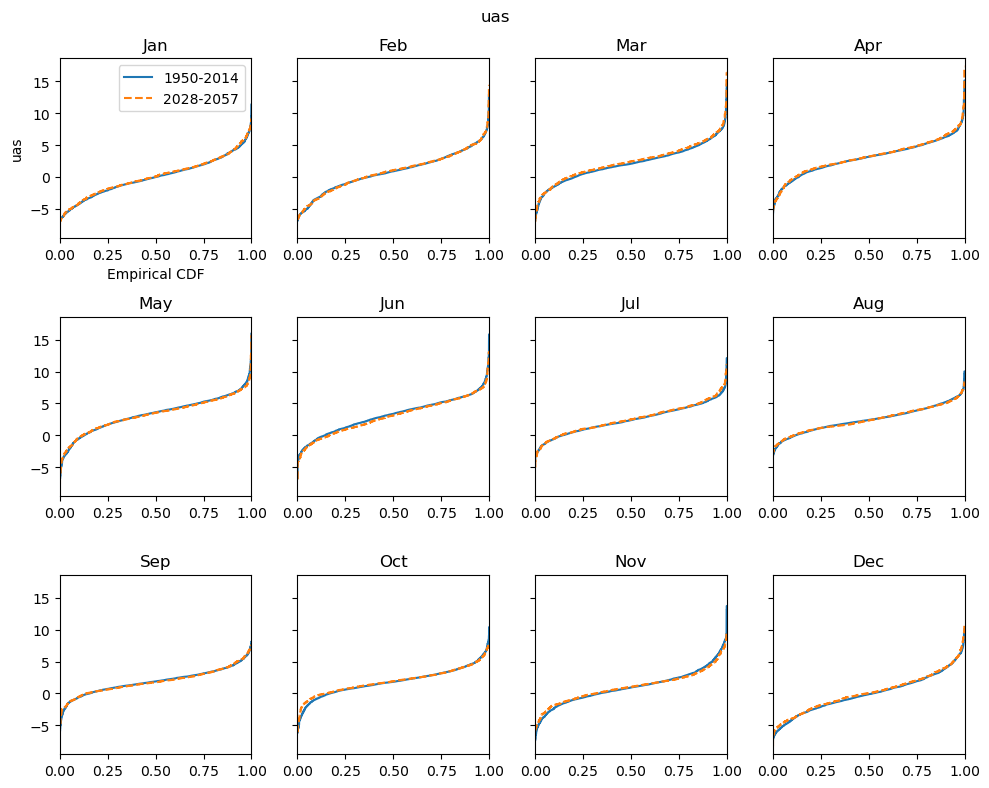

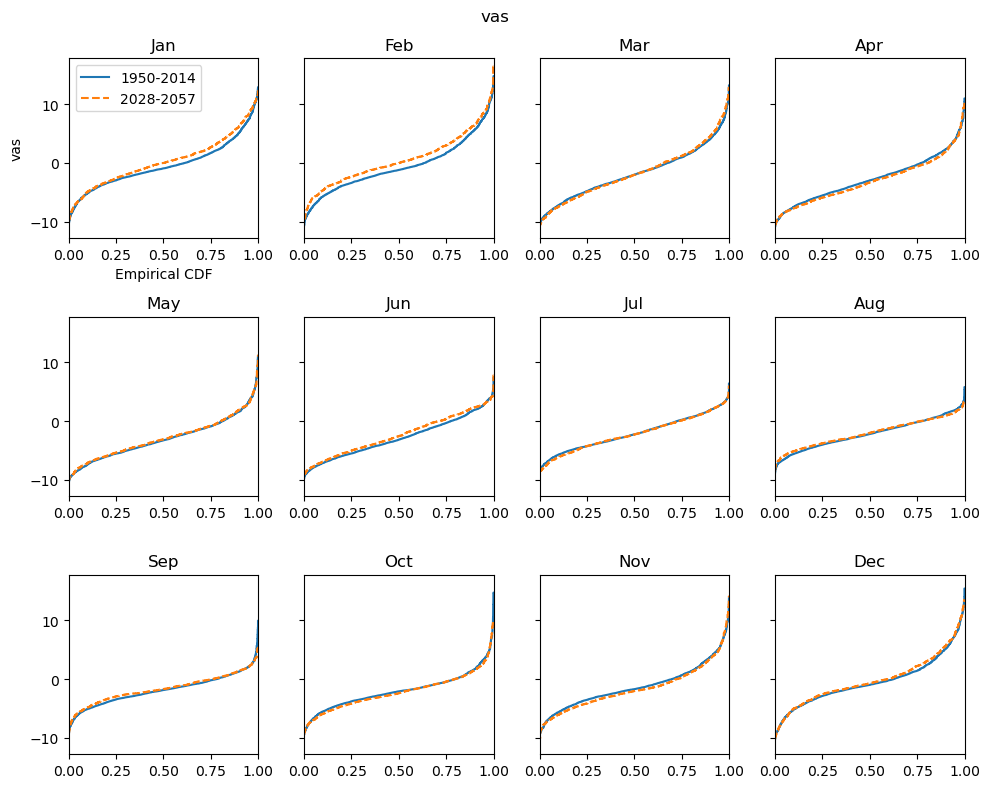

In [12]:
#modified from my code from the other loca2 data

#in a loop for each month for each variable
#first get the keys for the column heads
vars=list(df_h_pr.columns)[1:-1] #drop the first and last variables which are time and month. respectively
print(vars)
monthlist=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
flag=0
subs='_'
for v in vars:
    fig, ax = plt.subplots(3,4,figsize=(10,8),sharey=True)
    fig.suptitle(v)
    varname= v.split(subs)[0]
    for m in np.arange(1,13):
        vm_hist=df_h_pr.where(df_h_pr.month== m)[v].dropna()
        vm_proj=df_p_pr.where(df_p_pr.month== m)[v].dropna()
        r = (m-1)//4
        c = (m-1)%4
        
        if m==1 :
            flag=1
            ax[r,c].ecdf(vm_hist,label="1950-2014",orientation='horizontal')
            ax[r,c].ecdf(vm_proj,label="2015-2044",orientation='horizontal',ls="--" )
            ax[r,c].legend()
            ax[r,c].set_ylabel(v)
            ax[r,c].set_xlabel('Empirical CDF')
        else:
            ax[r,c].ecdf(vm_hist,orientation='horizontal')
            ax[r,c].ecdf(vm_proj,orientation='horizontal',ls="--" )
        ax[r,c].set_title(monthlist[m-1])
        
        
    plt.tight_layout()
    # filename='NE_corner_HRRR_'+varname+'.png'
    # plt.savefig('/global/scratch/users/jennaisrael/time_varying_data/cleaned_aws/quantile_plots/'+filename)

In [13]:
#repeat for monterey bay
df_h_mb=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2/EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.monterey_bay.csv")
df_p_mb=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2/EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.monterey_bay.csv")

['windspeed', 'psl', 'uas', 'vas']


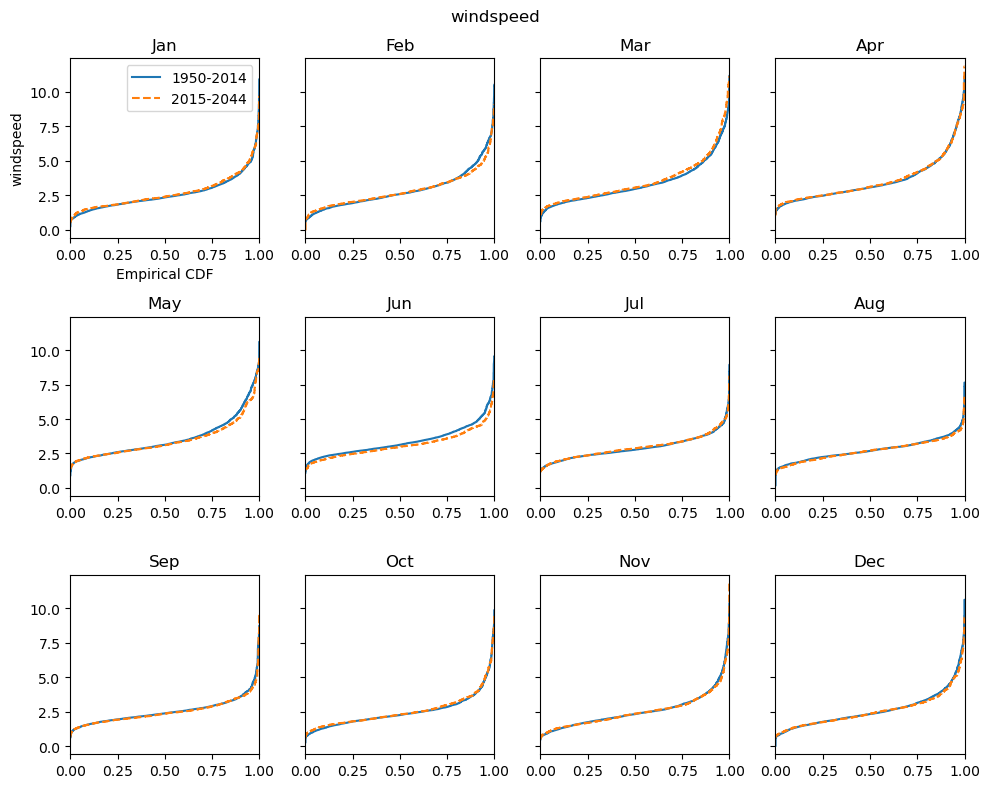

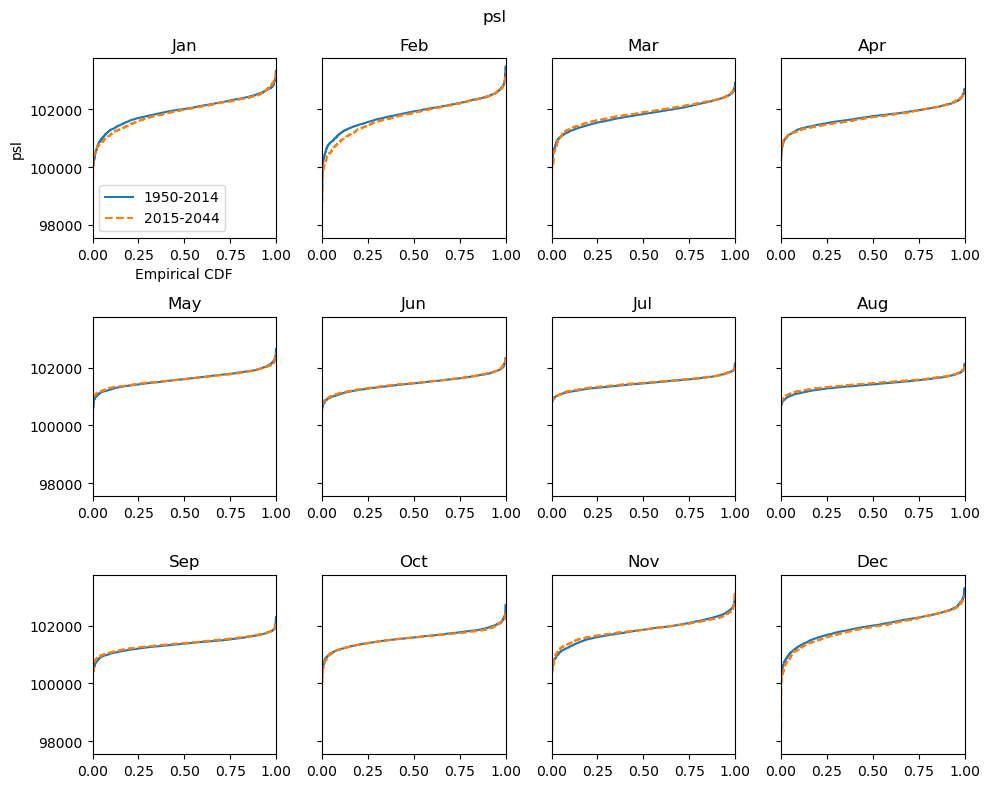

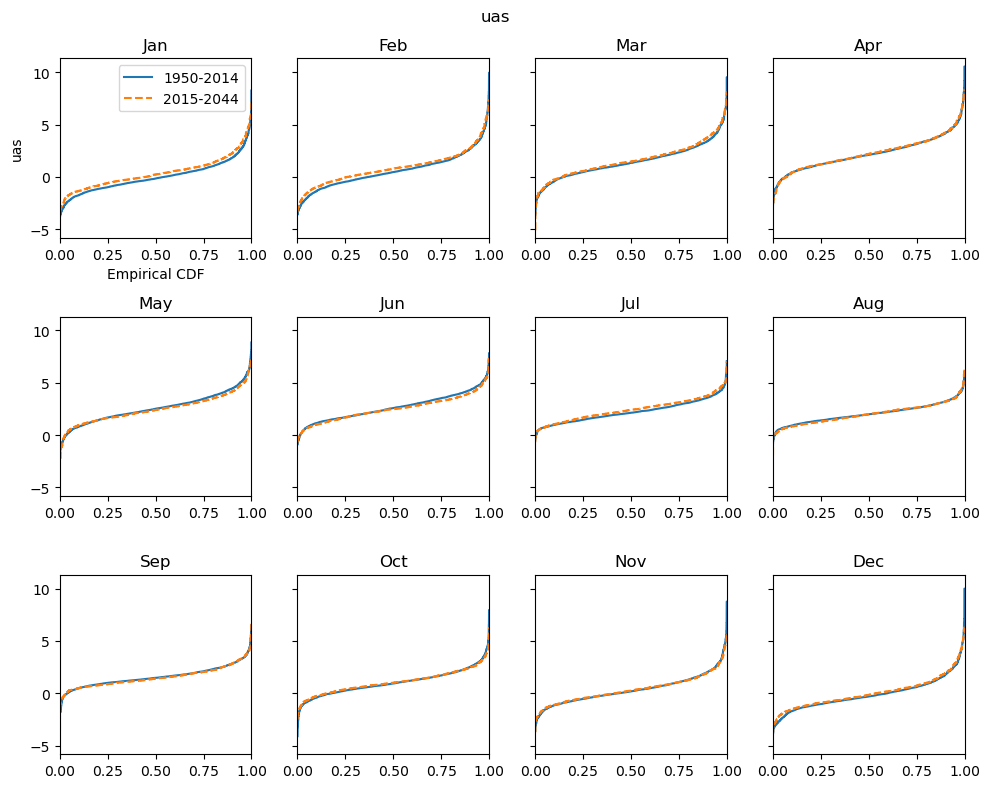

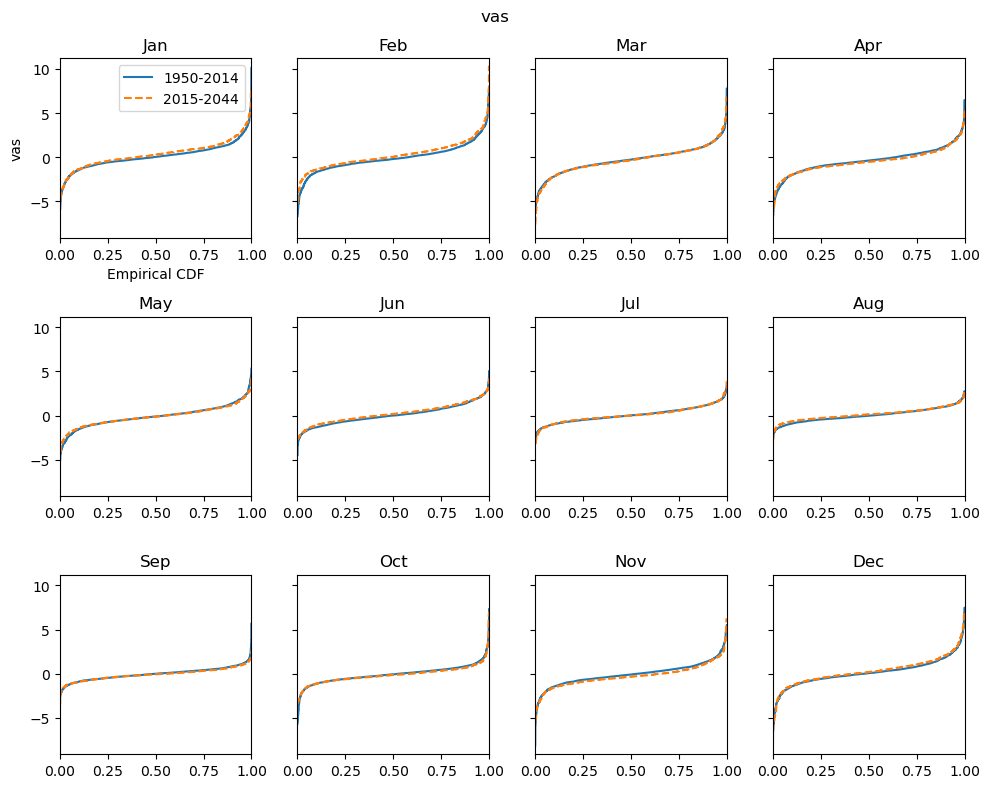

In [14]:
#modified from my code from the other loca2 data

#in a loop for each month for each variable
#first get the keys for the column heads
vars=list(df_h_mb.columns)[1:-1] #drop the first and last variables which are time and month. respectively
print(vars)
monthlist=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
flag=0
subs='_'
for v in vars:
    fig, ax = plt.subplots(3,4,figsize=(10,8),sharey=True)
    fig.suptitle(v)
    varname= v.split(subs)[0]
    for m in np.arange(1,13):
        vm_hist=df_h_mb.where(df_h_mb.month== m)[v].dropna()
        vm_proj=df_p_mb.where(df_p_mb.month== m)[v].dropna()
        r = (m-1)//4
        c = (m-1)%4
        
        if m==1 :
            flag=1
            ax[r,c].ecdf(vm_hist,label="1950-2014",orientation='horizontal')
            ax[r,c].ecdf(vm_proj,label="2015-2044",orientation='horizontal',ls="--" )
            ax[r,c].legend()
            ax[r,c].set_ylabel(v)
            ax[r,c].set_xlabel('Empirical CDF')
        else:
            ax[r,c].ecdf(vm_hist,orientation='horizontal')
            ax[r,c].ecdf(vm_proj,orientation='horizontal',ls="--" )
        ax[r,c].set_title(monthlist[m-1])
        
        
    plt.tight_layout()
    # filename='NE_corner_HRRR_'+varname+'.png'
    # plt.savefig('/global/scratch/users/jennaisrael/time_varying_data/cleaned_aws/quantile_plots/'+filename)

In [25]:
#what does Sam's dataset look like again
mb_sam=pd.read_fwf("/global/scratch/users/jennaisrael/time_varying_data/slr_data_sam/data4regrbuild.daily.era5.monterey.norm0.txt")
mb_sam.columns=["Year", "Month", "Day", "ResWL_lo", "ResWL_hi", "SLPa", "TASa", "N34a", "PDOa", "U10a", "V10a"]
mb_sam


,Year,Month,Day,ResWL_lo,ResWL_hi,SLPa,TASa,N34a,PDOa,U10a,V10a
0,1973,11,12,-0.02788,0.05941,-2.01526,1.15286,-2.07505,-1.28235,0.58345,62.36506
1,1973,11,13,-0.02278,0.01739,0.51379,0.14197,-2.08711,-1.28528,-10.66715,35.28530
2,1973,11,14,-0.01262,-0.03827,2.04980,0.37289,-2.09914,-1.28824,-9.67575,30.52757
3,1973,11,15,-0.00850,-0.06106,2.26141,0.08441,-2.11116,-1.29122,-12.71806,30.81868
4,1973,11,16,-0.02547,0.00956,-3.54065,0.87811,-2.11025,-1.27463,-8.62905,67.52818
...,...,...,...,...,...,...,...,...,...,...,...
17092,2020,12,27,-0.00009,0.01417,-1.68414,-1.22424,-1.32486,-0.91245,-1.72206,2.64090
17093,2020,12,28,0.00145,0.13299,-12.65814,-1.16611,-1.32366,-0.91397,9.90384,20.82512
17094,2020,12,29,0.00355,0.00568,0.04828,-0.54269,-1.32248,-0.91541,10.16266,-30.99345
17095,2020,12,30,0.00470,-0.07551,7.64056,-0.49118,-1.32132,-0.91676,2.84751,-3.36609


In [18]:
mb_sam

,1973 11 11 -0.02707 0.05389 -0.92340 0.85739 -2.06298 -1.27945 -62.89234 115.78791
0,1973 11 12 -0.02788 0.05941 -2....
1,1973 11 13 -0.02278 0.01739 0....
2,1973 11 14 -0.01262 -0.03827 2....
3,1973 11 15 -0.00850 -0.06106 2....
4,1973 11 16 -0.02547 0.00956 -3....
...,...
17092,2020 12 27 -0.00009 0.01417 -1....
17093,2020 12 28 0.00145 0.13299 -12....
17094,2020 12 29 0.00355 0.00568 0....
17095,2020 12 30 0.00470 -0.07551 7....
